#### <b>Preprocessing experimental PXRDs</b>

This notebook pertains to showing a demonstration on accepting experimental PXRDs (in the form of .xy files), preprocess them and then output them such that they are ready for use. Regarding the other input to XRayPro (i.e. the precursor composition), it is assumed that the user knows the SMILES string for the metal type and organic linker in the format ``[metal_type].[organic_linker]``, but if not, ``cheminfo`` is a great resource for this (with a cool demo already loaded in): https://www.cheminfo.org/flavor/malaria/Utilities/SMILES_generator___checker/index.html

We can import the ``expPXRDTransform`` function from the ``utils`` folder. This is the main function of interest, which builds on the ``transformPXRD`` function (found in the same file).

In [37]:
from utils.transform_pxrd import expPXRDTransform
import matplotlib.pyplot as plt
import numpy as np

import sys
print(f'Python version: {sys.version}')

Python version: 3.11.9 (main, Apr 19 2024, 16:48:06) [GCC 11.2.0]


We will work with an example from Pougin et al. (2024) (https://pubs.acs.org/doi/10.1021/acsami.4c05527), where they have the PXRD pattern for a pyrene-based MOF.

In [14]:
directory_to_xy = 'utils/examples/Zn2-(TBAPy)_Activated.xy'

data = np.loadtxt(directory_to_xy, skiprows = 1)

# get the theta and corresponding intensity for each data point
theta, intensity = data[:, 0], data[:, 1]

For comparison purposes to our (future) preprocessed version, let us plot the received experimental PXRD data

Text(0, 0.5, 'Intensity (a.u.)')

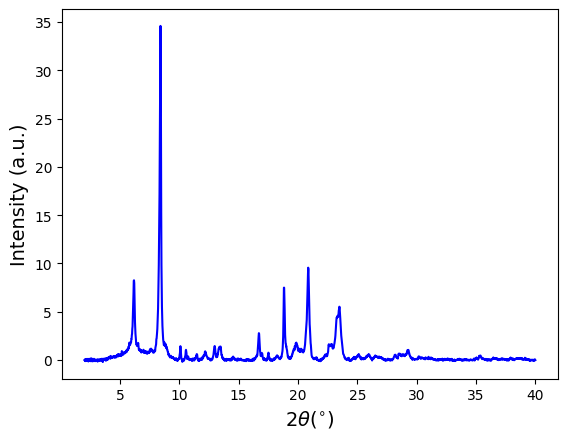

In [22]:
plt.plot(theta, intensity, c = 'blue')
plt.xlabel(r'$2\theta (^{\circ})$', fontsize = 14)
plt.ylabel('Intensity (a.u.)', fontsize = 14)

In [23]:
assert len(theta) == len(intensity)
print(f'Number of data points: {len(theta)}')

Number of data points: 1857


Of course, depending on the instrumentation's way of collecting data (i.e. how often does it record intensity), we will have a different number of data points for every PXRD - some may have 40 recorded data points, some (like this example) may have 1,857 recorded data points. The goal is to preprocess this such that all inputted PXRDs have the same shape for the XRayPro model (in this case, we want to transform it to (9000, ) shape). Also, from looking at the PXRD shown above, when we preprocess the data, we can choose an upperbound for $2\theta$. In this example, let's set ``two_theta_bound`` to (0, 30) (meaning that we should expect a similar shape as in the previous plot but up to 30 degrees).

In [24]:
directory_to_xy = 'utils/examples/Zn2-(TBAPy)_Activated.xy'

pattern = expPXRDTransform(directory_to_xy, two_theta_bound = (0, 30))
print(f'Shape of PXRD 1D array: {pattern.shape}')

Shape of PXRD 1D array: (9000,)


<b>What this means</b>: It means that there are 9000 data points between the angle space between 0 to 30 degrees, with the intensities aligning to each data point. In other words, the 1D array are only intensities, and the reason why we do not input $2\theta$ alongside the intensity is because there is no need to; every $2\theta$ in that batch of PXRDs will be ``np.linspace(0, 30, 9000)``. Furthermore, the intensities are normalized (for the sake of working with intensity ranges from 0 to 1 for the XRayPro model).

Text(0, 0.5, 'Normalized intensity (a.u.)')

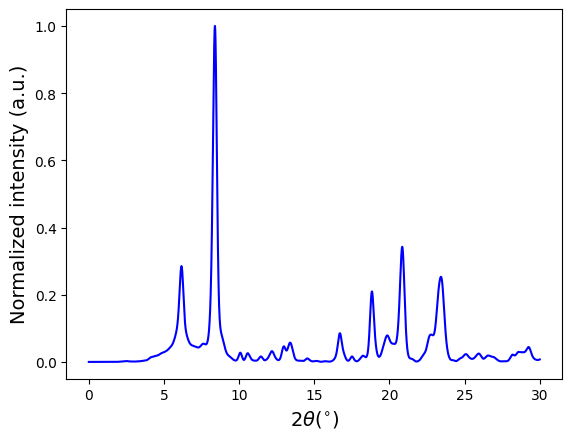

In [27]:
theta_preprocessed = np.linspace(0, 30, 9000)

plt.plot(theta_preprocessed, pattern, c = 'blue')
plt.xlabel(r'$2\theta (^{\circ})$', fontsize = 14)
plt.ylabel('Normalized intensity (a.u.)', fontsize = 14)

Even after preprocessing it for the ML model, it still matches the shape pretty well! Here's proof:

In [29]:
intensity_raw_norm = [x/np.max(intensity) for x in intensity] #so we can put everything on the same scale

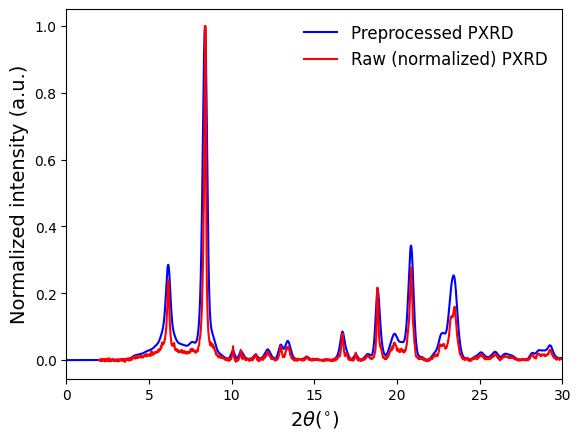

In [35]:
plt.plot(theta_preprocessed, pattern, c = 'blue', label = 'Preprocessed PXRD')
plt.plot(theta, intensity_raw_norm, c = 'red', label = 'Raw (normalized) PXRD')
plt.xlabel(r'$2\theta (^{\circ})$', fontsize = 14)
plt.ylabel('Normalized intensity (a.u.)', fontsize = 14)

plt.legend(frameon = False, fontsize = 12)
plt.xlim([0, 30])

plt.show()